In [1]:
import pandas as pd

In [2]:
wine = pd.read_csv('./wine.csv', sep = ',', index_col =0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [3]:
wine['color'].value_counts()

0    4898
1    1599
Name: color, dtype: int64

In [4]:
y = wine['color']
X = wine.drop(['color'], axis = 1) # X = wine.iloc[:,:-1]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size = 0.2, random_state = 13)

In [6]:
import numpy as np

np.unique(y_train, return_counts = True)

(array([0, 1]), array([3913, 1284]))

In [7]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state = 13, solver = 'liblinear', C = 10.)
log_reg.fit(X_train, y_train)

LogisticRegression(C=10.0, random_state=13, solver='liblinear')

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

pred = log_reg.predict(X_train)

print('Accuracy : ', accuracy_score(y_train, pred))
print('Precision : ', precision_score(y_train, pred))
print('Recall : ', recall_score(y_train, pred))

Accuracy :  0.9876852030017318
Precision :  0.9810725552050473
Recall :  0.9688473520249221


In [9]:
pred = log_reg.predict(X_test)
print('Accuracy : ', accuracy_score(y_test, pred))
print('Precision : ', precision_score(y_test, pred))
print('Recall : ', recall_score(y_test, pred))

Accuracy :  0.9876923076923076
Precision :  0.9838187702265372
Recall :  0.9650793650793651


In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[980,   5],
       [ 11, 304]])

<AxesSubplot:>

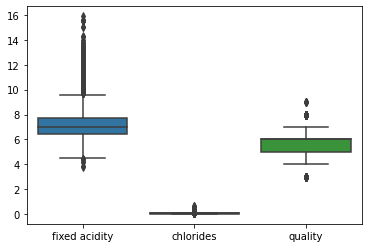

In [11]:
import seaborn as sns
sns.boxplot(data = X[['fixed acidity', 'chlorides', 'quality']])

In [12]:
# 정규화 (특성 간 격차를 줄임)
from sklearn.preprocessing import MinMaxScaler, StandardScaler

MMS = MinMaxScaler()
SS = StandardScaler()

MMS.fit(X)
SS.fit(X)

X_mms = MMS.transform(X)
X_ss = SS.transform(X)

In [13]:
X_ss_pd = pd.DataFrame(X_ss, columns = X.columns)
X_mms_pd = pd.DataFrame(X_mms, columns = X.columns)

<AxesSubplot:>

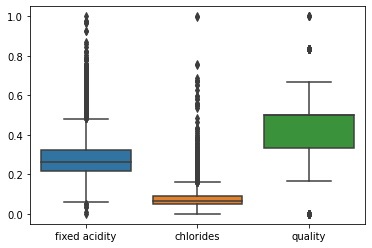

In [14]:
sns.boxplot(data = X_mms_pd[['fixed acidity', 'chlorides', 'quality']])

<AxesSubplot:>

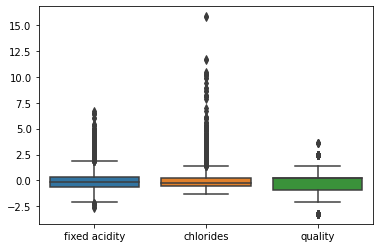

In [15]:
sns.boxplot(data = X_ss_pd[['fixed acidity', 'chlorides', 'quality']])

In [16]:
X_out = X_mms_pd
X_train, X_test, y_train, y_test = \
train_test_split(X_out, y, test_size = 0.2, random_state = 13)

log_reg = LogisticRegression(random_state = 13, solver = 'liblinear', C = 10.)
log_reg.fit(X_train, y_train)

pred = log_reg.predict(X_test)
accuracy_score(y_test, pred)

0.9884615384615385

In [17]:
X_out = X_ss_pd
X_train, X_test, y_train, y_test = \
train_test_split(X_out, y, test_size = 0.2, random_state = 13)

log_reg = LogisticRegression(random_state = 13, solver = 'liblinear', C = 10.)
log_reg.fit(X_train, y_train)

pred = log_reg.predict(X_test)

# accuracy, precision, recall 

In [18]:
print('Accuracy : ', accuracy_score(y_test, pred))
print('Precision : ', precision_score(y_test, pred))
print('Recall : ', recall_score(y_test, pred))

Accuracy :  0.9969230769230769
Precision :  0.9905362776025236
Recall :  0.9968253968253968


# # threshold 0.01, 0.5, 0.99 일 때 결과

In [19]:
from sklearn.preprocessing import Binarizer

pred_proba = log_reg.predict_proba(X_test)
pred_proba = pred_proba[:, 1].reshape(-1, 1)
pred_proba

array([[9.99982928e-01],
       [2.13788961e-04],
       [3.66605488e-04],
       ...,
       [9.98861496e-01],
       [9.69452964e-01],
       [9.74968471e-03]])

In [20]:
binarizer = Binarizer(threshold = 0.01).fit(pred_proba)
pred = binarizer.transform(pred_proba)

print('Threshold : 0.01')
print('Accuracy : ', accuracy_score(y_test, pred))
print('Precision : ', precision_score(y_test, pred))
print('Recall : ', recall_score(y_test, pred))

Threshold : 0.01
Accuracy :  0.9061538461538462
Precision :  0.7218390804597701
Recall :  0.9968253968253968


In [21]:
pred_proba = log_reg.predict_proba(X_test)
pred_proba = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold = 0.5).fit(pred_proba)
pred = binarizer.transform(pred_proba)

print('Threshold : 0.5')
print('Accuracy : ', accuracy_score(y_test, pred))
print('Precision : ', precision_score(y_test, pred))
print('Recall : ', recall_score(y_test, pred))

Threshold : 0.5
Accuracy :  0.9969230769230769
Precision :  0.9905362776025236
Recall :  0.9968253968253968


In [22]:
pred_proba = log_reg.predict_proba(X_test)
pred_proba = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold = 0.99).fit(pred_proba)
pred = binarizer.transform(pred_proba)

print('Threshold : 0.99')
print('Accuracy : ', accuracy_score(y_test, pred))
print('Precision : ', precision_score(y_test, pred))
print('Recall : ', recall_score(y_test, pred))

Threshold : 0.99
Accuracy :  0.9423076923076923
Precision :  0.9958677685950413
Recall :  0.765079365079365


# roc_curve and  precision_recall_curve

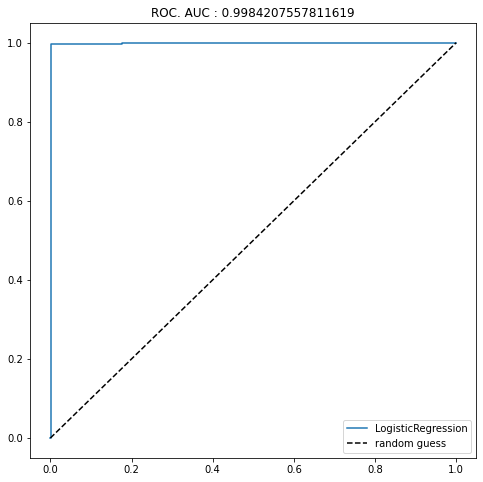

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

pred_proba = log_reg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

plt.figure(figsize = (8, 8))
plt.plot(fpr, tpr, label = 'LogisticRegression')
plt.plot([0, 1], [0, 1], 'k--', label = 'random guess')
plt.title("ROC. AUC : " + str(roc_auc_score(y_test, pred_proba)))
plt.legend()
plt.show()

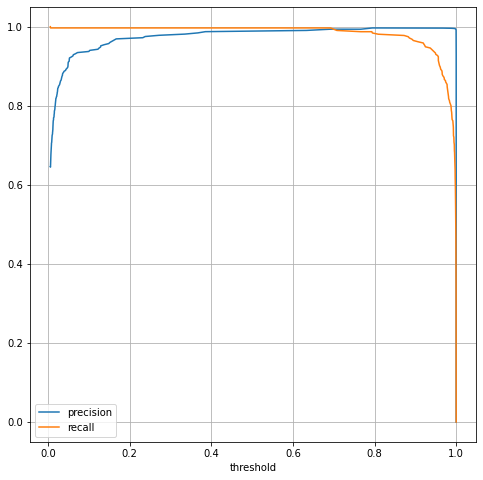

In [24]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)

plt.figure(figsize = (8, 8))
plt.plot(thresholds, precisions[:len(thresholds)], label = 'precision')
plt.plot(thresholds, recalls[:len(thresholds)], label = 'recall')
plt.legend()
plt.grid()
plt.xlabel('threshold')
plt.show()